In [46]:
from ISLP import load_data
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data=load_data("Weekly")

In [3]:
data.head()

,Year,Lag1,Lag2,Lag3,Lag4,Lag5,Volume,Today,Direction
0,1990,0.816,1.572,-3.936,-0.229,-3.484,0.154976,-0.270,Down
1,1990,-0.270,0.816,1.572,-3.936,-0.229,0.148574,-2.576,Down
2,1990,-2.576,-0.270,0.816,1.572,-3.936,0.159837,3.514,Up
3,1990,3.514,-2.576,-0.270,0.816,1.572,0.161630,0.712,Up
4,1990,0.712,3.514,-2.576,-0.270,0.816,0.153728,1.178,Up


In [4]:
label_=LabelEncoder()
direction_labels=label_.fit_transform(data["Direction"])
data["Direction"]=direction_labels

In [5]:
data["Year"]=data["Year"].astype("str")

In [6]:
second_dataset=data[(data["Year"]>="1990") & (data["Year"]<="2008")]
second_dataset.Year.unique()

array(['1990', '1991', '1992', '1993', '1994', '1995', '1996', '1997',
       '1998', '1999', '2000', '2001', '2002', '2003', '2004', '2005',
       '2006', '2007', '2008'], dtype=object)

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1089 entries, 0 to 1088
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Year       1089 non-null   object 
 1   Lag1       1089 non-null   float64
 2   Lag2       1089 non-null   float64
 3   Lag3       1089 non-null   float64
 4   Lag4       1089 non-null   float64
 5   Lag5       1089 non-null   float64
 6   Volume     1089 non-null   float64
 7   Today      1089 non-null   float64
 8   Direction  1089 non-null   int64  
dtypes: float64(7), int64(1), object(1)
memory usage: 76.7+ KB


In [8]:
data.describe()

,Lag1,Lag2,Lag3,Lag4,Lag5,Volume,Today,Direction
count,1089.000000,1089.000000,1089.000000,1089.000000,1089.000000,1089.000000,1089.000000,1089.000000
mean,0.150585,0.151079,0.147205,0.145818,0.139893,1.574618,0.149899,0.555556
std,2.357013,2.357254,2.360502,2.360279,2.361285,1.686636,2.356927,0.497132
min,-18.195000,-18.195000,-18.195000,-18.195000,-18.195000,0.087465,-18.195000,0.000000
25%,-1.154000,-1.154000,-1.158000,-1.158000,-1.166000,0.332022,-1.154000,0.000000
50%,0.241000,0.241000,0.241000,0.238000,0.234000,1.002680,0.241000,1.000000
75%,1.405000,1.409000,1.409000,1.409000,1.405000,2.053727,1.405000,1.000000
max,12.026000,12.026000,12.026000,12.026000,12.026000,9.328214,12.026000,1.000000


Text(0.5, 1.0, 'Lag1')

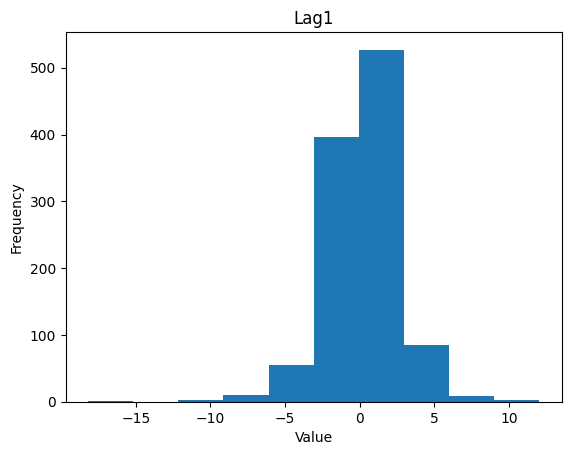

In [96]:
plt.hist(data.iloc[:,1])
plt.xlabel("Value")
plt.ylabel("Frequency")
plt.title("Lag1")

Text(0.5, 1.0, 'Lag2')

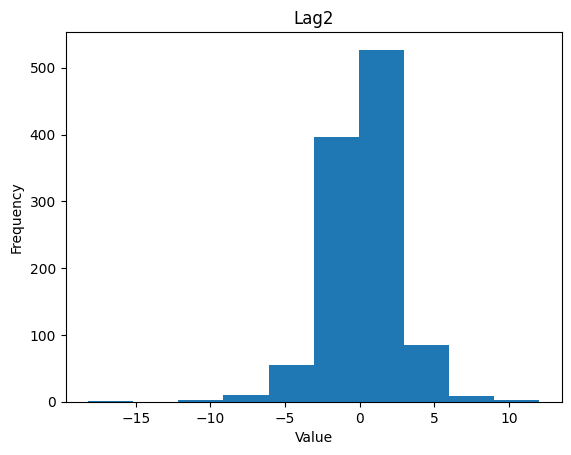

In [98]:
plt.hist(data.iloc[:,2])
plt.xlabel("Value")
plt.ylabel("Frequency")
plt.title("Lag2")

Text(0.5, 1.0, 'Lag3')

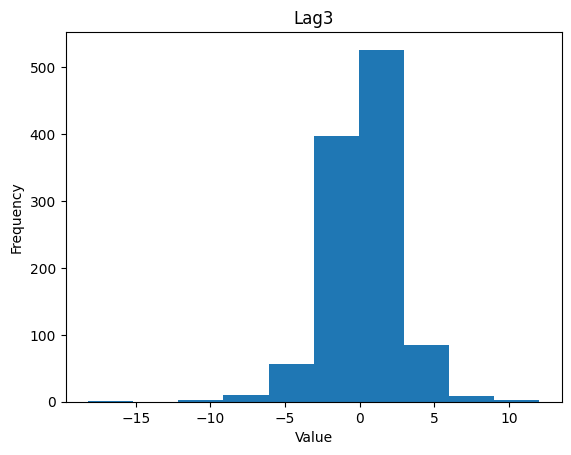

In [99]:
plt.hist(data.iloc[:,3])
plt.xlabel("Value")
plt.ylabel("Frequency")
plt.title("Lag3")

Text(0.5, 1.0, 'Lag4')

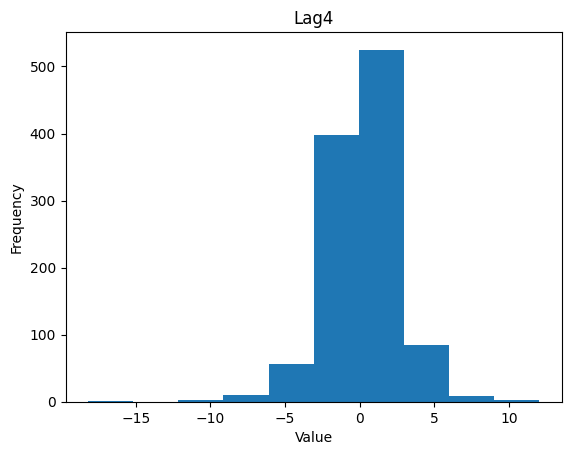

In [100]:
plt.hist(data.iloc[:,4])
plt.xlabel("Value")
plt.ylabel("Frequency")
plt.title("Lag4")

Text(0.5, 1.0, 'Lag5')

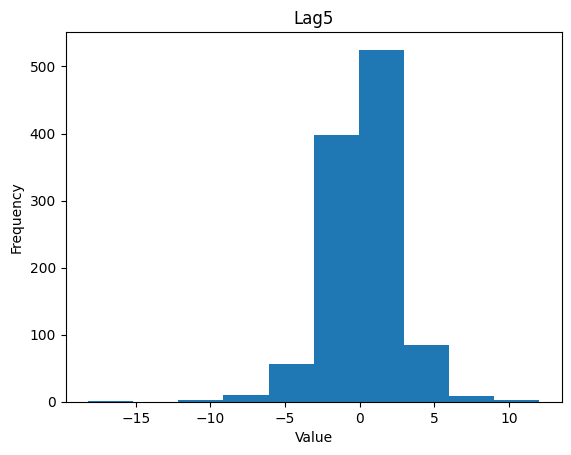

In [101]:
plt.hist(data.iloc[:,5])
plt.xlabel("Value")
plt.ylabel("Frequency")
plt.title("Lag5")

Text(0.5, 1.0, 'Volume')

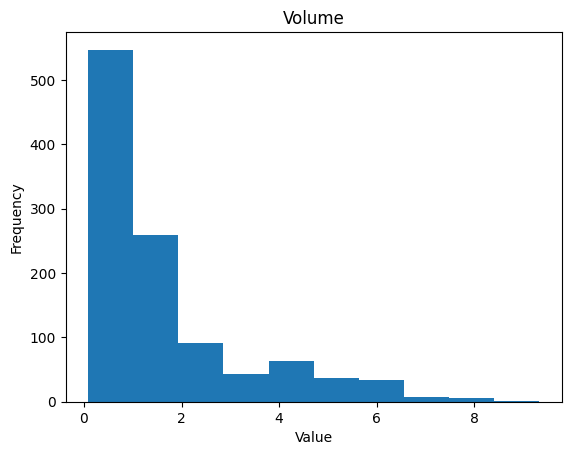

In [102]:
plt.hist(data.iloc[:,6])
plt.xlabel("Value")
plt.ylabel("Frequency")
plt.title("Volume")

Text(0.5, 1.0, 'Today')

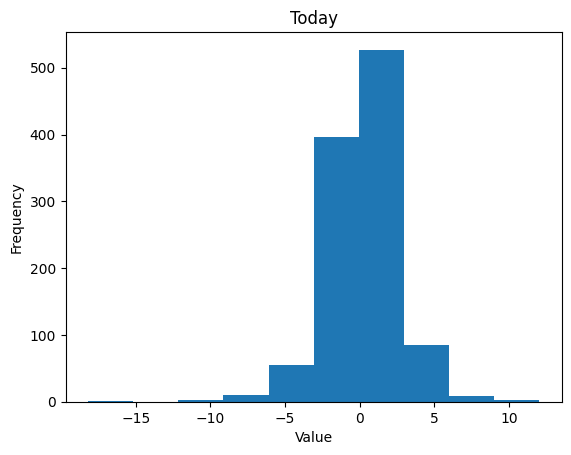

In [103]:
plt.hist(data.iloc[:,7])
plt.xlabel("Value")
plt.ylabel("Frequency")
plt.title("Today")

In [17]:
X=data.iloc[:,1:6]
y=data["Direction"]

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=.3, random_state=42)

In [19]:
LR1Model=sm.Logit(y_train, X_train)

In [20]:
results=LR1Model.fit()

Optimization terminated successfully.
         Current function value: 0.686841
         Iterations 4


In [21]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              Direction   No. Observations:                  762
Model:                          Logit   Df Residuals:                      757
Method:                           MLE   Df Model:                            4
Date:                Wed, 20 Aug 2025   Pseudo R-squ.:                0.004641
Time:                        17:32:45   Log-Likelihood:                -523.37
converged:                       True   LL-Null:                       -525.81
Covariance Type:            nonrobust   LLR p-value:                    0.2997
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Lag1          -0.0428      0.031     -1.366      0.172      -0.104       0.019
Lag2           0.0719      0.031      2.310      0.021       0.011       0.133
Lag3          -0.0207      0.031     -0.664      0.507      -0.082       0.040
Lag4          -0.0434      0.031     -1.394      0.163      -0.104       0.018
Lag5          -0.0002      0.031     -0.005      0.996      -0.060       0.060
==============================================================================
"""

In [22]:
preds=results.predict(X_test)

In [23]:
prediction_conv=[]
for i in preds:
    if i>=.5:
        prediction_conv.append(1)
    else:
        prediction_conv.append(0)

In [24]:
confusion_matrix=confusion_matrix(y_test, prediction_conv)

In [25]:
confusion_matrix

array([[ 74,  59],
       [102,  92]])

In [105]:
accuracy=round((92/(74+59+102+92))*100,0)
print(f" Accuracy: {accuracy}%")
precision=round((92/(92+102))* 100,0)
print(f" Precision: {precision}%")
recall=round((92/(92+74))*100, 0)
print(f" Recall: {recall}%")

 Accuracy: 28.0%
 Precision: 47.0%
 Recall: 55.0%


In [82]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA, QuadraticDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier

In [30]:
X2=second_dataset["Lag2"]
y2=second_dataset["Direction"]

In [31]:
X_train2, X_test2, y_train2, y_test2 = train_test_split(X2,y2,test_size=.3, random_state=42)

In [32]:
#LDA

In [36]:
lda = LDA()
lda.fit(pd.DataFrame(X_train2), y_train2)

,solver,'svd'
,shrinkage,None
,priors,None
,n_components,None
,store_covariance,False
,tol,0.0001
,covariance_estimator,None


In [38]:
lda_pred=lda.predict(pd.DataFrame(X_test2))

In [48]:
lda_confusion_matrix=confusion_matrix(pd.Series(y_test2), pd.Series(lda_pred))

In [49]:
lda_confusion_matrix

array([[ 19, 113],
       [ 20, 144]])

In [53]:
LDAaccuracy=round((144/(19+113+20+144))*100,0)
print(f" LDA Accuracy: {LDAaccuracy}%")
LDAprecision=round((144/(144+20))* 100,0)
print(f" LDA Precision: {LDAprecision}%")
LDArecall=round((144/(144+19))*100, 0)
print(f" LDA Recall: {LDArecall}%")

 LDA Accuracy: 49.0%
 LDA Precision: 88.0%
 LDA Recall: 88.0%


In [ ]:
#QDA

In [62]:
QDA_=QuadraticDiscriminantAnalysis()
QDA_.fit(pd.DataFrame(X_train2), y_train2)

,priors,None
,reg_param,0.0
,store_covariance,False
,tol,0.0001


In [67]:
QDA_pred=QDA_.predict(pd.DataFrame(X_test2))

In [68]:
QDA_confusion_matrix=confusion_matrix(y_test2, QDA_pred)
QDA_confusion_matrix

array([[ 14, 118],
       [ 16, 148]])

In [77]:
QDAaccuracy=round((148/(14+118+16+148))*100,0)
print(f" QDA Accuracy: {QDAaccuracy}%")
QDAprecision=round((148/(148+16))* 100,0)
print(f" QDA Precision: {QDAprecision}%")
QDArecall=round((148/(148+14))*100, 0)
print(f" QDA Recall: {QDArecall}%")

 QDA Accuracy: 50.0%
 QDA Precision: 90.0%
 QDA Recall: 91.0%


In [ ]:
#KNN K=1

In [88]:
KNN=KNeighborsClassifier(n_neighbors=1)
KNN.fit(pd.DataFrame(X_train2), y_train2)

,n_neighbors,1
,weights,'uniform'
,algorithm,'auto'
,leaf_size,30
,p,2
,metric,'minkowski'
,metric_params,None
,n_jobs,None


In [89]:
KNN_preds=KNN.predict(pd.DataFrame(X_test2))

In [90]:
KNN_confusion_matrix=confusion_matrix(y_test2, KNN_preds)
KNN_confusion_matrix

array([[58, 74],
       [99, 65]])

In [94]:
KNNaccuracy=round((65/(58+74+99+65))*100,0)
print(f" KNN Accuracy: {KNNaccuracy}%")
KNNprecision=round((65/(99+65))* 100,0)
print(f" KNN Precision: {KNNprecision}%")
KNNrecall=round((65/(65+58))*100, 0)
print(f" KNN Recall: {KNNrecall}%")

 KNN Accuracy: 22.0%
 KNN Precision: 40.0%
 KNN Recall: 53.0%


In [ ]:
#naive Bayes

In [72]:
NB=GaussianNB()
NB.fit(pd.DataFrame(X_train2), y_train2)

,priors,None
,var_smoothing,1e-09


In [73]:
NB_preds=NB.predict(pd.DataFrame(X_test2))

In [75]:
NB_confusion_matrix=confusion_matrix(y_test2, NB_preds)
NB_confusion_matrix

array([[ 14, 118],
       [ 16, 148]])

In [76]:
NBAaccuracy=round((148/(14+118+16+148))*100,0)
print(f" NB Accuracy: {NBAaccuracy}%")
NBprecision=round((148/(148+16))* 100,0)
print(f" NB Precision: {NBprecision}%")
NBrecall=round((148/(148+14))*100, 0)
print(f" NB Recall: {NBrecall}%")

 NB Accuracy: 50.0%
 NB Precision: 90.0%
 NB Recall: 91.0%


In [ ]:
#Volume (Predictor) and Direction (Response)

In [104]:
X3=second_dataset["Volume"]
y3=second_dataset["Direction"]

In [106]:
X_train3, X_test3, y_train3, y_test3 = train_test_split(X3,y3,test_size=.3, random_state=42)

In [107]:
LR1Model3=sm.Logit(y_train3, X_train3)

In [108]:
results3=LR1Model3.fit()

Optimization terminated successfully.
         Current function value: 0.691655
         Iterations 4


In [112]:
preds3=results3.predict(X_test3)

In [113]:
prediction_conv3=[]
for i in preds3:
    if i>=.5:
        prediction_conv3.append(1)
    else:
        prediction_conv3.append(0)

In [115]:
confusion_matrix3=confusion_matrix(y_test3, prediction_conv3)
confusion_matrix3

array([[  0, 132],
       [  0, 164]])

In [116]:
accuracy3=round((164/(0+132+0+164))*100,0)
print(f" Accuracy: {accuracy3}%")
precision3=round((164/(164+0))* 100,0)
print(f" Precision: {precision3}%")
recall3=round((164/(164+0))*100, 0)
print(f" Recall: {recall3}%")

 Accuracy: 55.0%
 Precision: 100.0%
 Recall: 100.0%


In [117]:
KNN3=KNeighborsClassifier(n_neighbors=3)
KNN3.fit(pd.DataFrame(X_train3), y_train3)

,n_neighbors,3
,weights,'uniform'
,algorithm,'auto'
,leaf_size,30
,p,2
,metric,'minkowski'
,metric_params,None
,n_jobs,None


In [118]:
KNN_preds3=KNN3.predict(pd.DataFrame(X_test3))

In [119]:
KNN_confusion_matrix3=confusion_matrix(y_test3, KNN_preds3)
KNN_confusion_matrix3

array([[57, 75],
       [71, 93]])

In [120]:
KNNaccuracy3=round((93/(57+75+71+93))*100,0)
print(f" KNN3 Accuracy: {KNNaccuracy3}%")
KNNprecision3=round((93/(93+71))* 100,0)
print(f" KNN3 Precision: {KNNprecision3}%")
KNNrecall3=round((93/(93+57))*100, 0)
print(f" KNN3 Recall: {KNNrecall3}%")

 KNN3 Accuracy: 31.0%
 KNN3 Precision: 57.0%
 KNN3 Recall: 62.0%


In [122]:
y3.value_counts()

Direction
1    544
0    441
Name: count, dtype: int64